In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# **PROJECT MODUL 3: MACHINE LEARNING**
# **BY: ADRI HAMDI**

## Latar Belakang

1. Analisis ini bertujuan untuk mengidentifikasi faktor-faktor yang mempengaruhi keberhasilan kampanye pemasaran bank dalam menarik nasabah untuk melakukan deposito berjangka. Dengan memahami faktor-faktor ini, bank dapat mengembangkan strategi pemasaran yang lebih efektif, yang pada akhirnya dapat meningkatkan profitabilitas dan kepuasan nasabah.
2. Analisis ini bertujuan untuk mengidentifikasi faktor-faktor yang mempengaruhi keberhasilan kampanye pemasaran bank dalam menarik nasabah untuk melakukan deposito berjangka. Dengan memahami faktor-faktor ini, bank dapat mengembangkan strategi pemasaran yang lebih efektif, yang pada akhirnya dapat meningkatkan profitabilitas dan kepuasan nasabah.
3. Analisis ini bertujuan untuk mengidentifikasi faktor-faktor yang mempengaruhi keberhasilan kampanye pemasaran bank dalam menarik nasabah untuk melakukan deposito berjangka. Dengan memahami faktor-faktor ini, bank dapat mengembangkan strategi pemasaran yang lebih efektif, yang pada akhirnya dapat meningkatkan profitabilitas dan kepuasan nasabah.

## **Problem Statement**


Saat ini, perusahaan menghadapi masalah di mana kampanye pemasaran sering kali dikirimkan kepada segmen pelanggan yang besar, tanpa pemahaman yang mendalam tentang siapa yang sebenarnya akan merespons dengan melakukan deposit. Hal ini menyebabkan pemborosan sumber daya yang signifikan, baik dalam bentuk biaya pemasaran maupun waktu dan tenaga kerja, sementara hasil yang diharapkan tidak tercapai. Oleh karena itu, penting untuk mengembangkan model prediktif yang dapat membantu meminimalkan pengeluaran dengan cara memfokuskan kampanye hanya pada pelanggan yang kemungkinan besar untuk melakukan deposit.

Setelah menganalisis berbagai metrik yang dapat digunakan untuk mengevaluasi model prediktif, saya memutuskan bahwa `**presisi**` adalah metrik yang paling relevan dalam konteks ini. Presisi mengukur seberapa baik model dalam memprediksi pelanggan yang benar-benar melakukan deposit dari keseluruhan prediksi positif. Dengan fokus pada presisi, saya berupaya memastikan bahwa setiap kampanye yang dilakukan atau dikirimkan memiliki peluang yang tinggi untuk mendorong pelanggan melakukan deposit.

Memilih `presisi` sebagai metrik utama sangat penting karena membantu mengurangi jumlah false positives, yaitu kasus di mana model memprediksi seorang pelanggan akan melakukan deposit, tetapi kenyataannya tidak. Dengan mengurangi `false positives`, saya dapat menghemat biaya kampanye dengan hanya menargetkan pelanggan yang benar-benar potensial. Ini tidak hanya akan mengurangi pemborosan sumber daya, tetapi juga meningkatkan return on investment (ROI) dari kampanye pemasaran yang dijalankan.

Dengan demikian, presisi adalah kunci untuk mencapai efisiensi dan efektivitas dalam kampanye pemasaran, memungkinkan perusahaan untuk memaksimalkan keuntungan sambil meminimalkan pengeluaran yang tidak perlu.


## Objektif
Tujuan dari analisis ini adalah untuk mencari model yang terbaik dan mempunyai nilai presisi paling tinggi. Model ini dirancang untuk meningkatkan efisiensi kampanye pemasaran dengan mengidentifikasi pelanggan yang paling mungkin untuk merespon. Dengan fokus pada **presisi**, model ini bertujuan untuk mengurangi jumlah kampanye yang dikirimkan kepada pelanggan yang tidak potensial, sehingga secara signifikan menghemat biaya dan meningkatkan return on investment (ROI) dari setiap kampanye.

## Buka dataset csv

In [307]:
data = pd.read_csv('data_bank_marketing_campaign.csv')
data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [308]:
def detect_outliers(data, column):
    # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Mendefinisikan batas bawah dan atas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menghitung jumlah outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    return outlier_count, (outlier_count / len(data)) * 100

# Membuat daftar informasi tentang setiap kolom
column_info = []

for col in data.columns:
    dtype = data[col].dtype
    nan_count = data[col].isna().sum()
    nan_percent = (nan_count / len(data)) * 100
    unique_values = data[col].unique()
    nunique = data[col].nunique()
    
    if dtype in ['int64', 'float64']:
        outlier_count, outlier_percent = detect_outliers(data, col)
    else:
        outlier_count, outlier_percent = np.nan, np.nan
    
    column_info.append({
        'Column Name': col,
        'Data Type': dtype,
        'NaN Count': nan_count,
        'NaN %': nan_percent,
        'Unique Values': unique_values,
        'nUnique': nunique,
        'Outlier Count': outlier_count,
        'Outlier %': outlier_percent
    })

# Mengubah daftar informasi menjadi dataframe
column_info_df = pd.DataFrame(column_info)
column_info_df

,Column Name,Data Type,NaN Count,NaN %,Unique Values,nUnique,Outlier Count,Outlier %
0,age,int64,0,0.0,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3...",75,121.0,1.548701
1,job,object,0,0.0,"[admin., self-employed, services, housemaid, t...",12,NaN,NaN
2,balance,int64,0,0.0,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ...",3153,736.0,9.420197
3,housing,object,0,0.0,"[no, yes]",2,NaN,NaN
4,loan,object,0,0.0,"[no, yes]",2,NaN,NaN
5,contact,object,0,0.0,"[cellular, telephone, unknown]",3,NaN,NaN
6,month,object,0,0.0,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ...",12,NaN,NaN
7,campaign,int64,0,0.0,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28...",32,429.0,5.490849
8,pdays,int64,0,0.0,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,...",422,1454.0,18.610009
9,poutcome,object,0,0.0,"[unknown, other, failure, success]",4,NaN,NaN


### Analisis Detail Setiap Kolom

Setelah menganalisa detail setiap kolom dalam dataset, berikut adalah beberapa hal yang perlu diperhatikan terkait nilai unik (`unique values`) dan outlier:

#### 1. Kolom `age`
- **Jumlah Nilai Unik**: 75
- **Outlier**: Terdapat 121 outlier (sekitar 1.5% dari data). Meskipun jumlah outlier ini tidak besar, nilai ekstrim pada usia (baik yang sangat muda maupun sangat tua) bisa relevan untuk analisis lebih lanjut, terutama jika mereka mewakili segmen pelanggan tertentu.
- **Unique Values**: Distribusi usia cukup luas, dan tidak ada nilai yang mencurigakan di sini.

#### 2. Kolom `job`
- **Jumlah Nilai Unik**: 12
- **Outlier**: Tidak ada outlier yang dihitung karena ini adalah data kategorikal. Jumlah nilai uniknya wajar, mencakup berbagai jenis pekerjaan yang bisa dimiliki pelanggan.
- **Unique Values**: Daftar pekerjaan terlihat beragam dan mencakup berbagai kategori pekerjaan yang umum. Tidak ada nilai yang mencurigakan, tetapi kita perlu memastikan bahwa semua kategori pekerjaan relevan untuk analisis.

#### 3. Kolom `balance`
- **Jumlah Nilai Unik**: 3153
- **Outlier**: Terdapat 736 outlier (sekitar 9.4% dari data). Ini adalah jumlah yang cukup signifikan, yang menunjukkan ada pelanggan dengan saldo rekening yang sangat tinggi atau sangat rendah. Penting untuk mempertimbangkan apakah outlier ini perlu dihapus, disesuaikan, atau dibiarkan, karena mereka mungkin memberikan wawasan penting tentang segmen pelanggan yang memiliki pola keuangan yang tidak biasa.
- **Unique Values**: Distribusi saldo rekening sangat beragam, dan mungkin ada beberapa nilai negatif yang perlu diperiksa lebih lanjut.

#### 4. Kolom `housing` dan `loan`
- **Jumlah Nilai Unik**: 2
- **Outlier**: Tidak ada outlier yang diidentifikasi karena ini adalah data biner ("yes" atau "no"). Jumlah nilai uniknya juga wajar dan sesuai dengan sifat dari variabel biner.
- **Unique Values**: Tidak ada masalah yang terlihat dalam nilai unik dari kedua kolom ini.

#### 5. Kolom `contact`
- **Jumlah Nilai Unik**: 3
- **Outlier**: Tidak ada outlier yang teridentifikasi. Namun, kita perlu memberikan perhatian khusus pada kategori `unknown`, karena bisa jadi ini memerlukan penanganan khusus seperti penggabungan atau penghapusan.
- **Unique Values**: Nilai `unknown` dalam kolom ini perlu diperhatikan karena dapat mempengaruhi interpretasi dan hasil model.

#### 6. Kolom `month`
- **Jumlah Nilai Unik**: 12
- **Outlier**: Tidak ada outlier yang diidentifikasi. Jumlah nilai uniknya sesuai dengan jumlah bulan dalam satu tahun, sehingga tidak ada masalah yang perlu diperhatikan di sini.
- **Unique Values**: Nilai unik dalam kolom ini sesuai dengan bulan, dan distribusinya terlihat normal.

#### 7. Kolom `campaign`
- **Jumlah Nilai Unik**: 32
- **Outlier**: Terdapat 429 outlier (sekitar 5.5% dari data). Ini menunjukkan ada beberapa kampanye yang memiliki jumlah kontak yang sangat tinggi, yang mungkin tidak biasa. Kita perlu menilai apakah ini disebabkan oleh kesalahan data atau memang ada kampanye yang sangat agresif.
- **Unique Values**: Nilai kampanye yang sangat tinggi perlu diperhatikan, karena mungkin tidak realistis atau mencerminkan strategi pemasaran yang ekstrim.

#### 8. Kolom `pdays`
- **Jumlah Nilai Unik**: 422
- **Outlier**: Terdapat 1454 outlier (sekitar 18.6% dari data). Jumlah outlier yang besar ini kemungkinan besar disebabkan oleh nilai-nilai `pdays` yang sangat ekstrim, seperti pelanggan yang baru saja dihubungi atau sudah lama sekali dihubungi. Perlu dipertimbangkan apakah outlier ini mencerminkan pola komunikasi yang relevan atau harus ditangani lebih lanjut.
- **Unique Values**: Perlu diperhatikan apakah ada nilai `pdays` yang menonjol secara signifikan, yang mungkin disebabkan oleh kesalahan atau situasi yang tidak biasa.

#### 9. Kolom `poutcome`
- **Jumlah Nilai Unik**: 4
- **Outlier**: Tidak ada outlier yang diidentifikasi. Namun, perhatian khusus perlu diberikan pada kategori `unknown` karena ini bisa mempengaruhi hasil analisis dan model prediksi.
- **Unique Values**: Nilai `unknown` dalam kolom ini perlu dipertimbangkan lebih lanjut, apakah akan diperlakukan secara khusus dalam model.

### Kesimpulan:
- **Outlier pada Kolom `balance`, `campaign`, dan `pdays`**: Outlier di kolom-kolom ini perlu dilihat lebih lanjut untuk menentukan apakah mereka harus dipertahankan, disesuaikan, atau dihapus.
- **Unique Values**: Secara umum, distribusi nilai unik dalam dataset terlihat wajar. Namun, perhatian perlu diberikan pada kategori `unknown` atau `other` di kolom seperti `contact` dan `poutcome` untuk memastikan data tersebut ditangani dengan benar dalam analisis lanjutan.

Rekomendasi selanjutnya adalah melakukan analisa lebih lanjut terhadap outlier, menangani nilai `unknown` dalam kolom-kolom tersebut, dan memastikan bahwa data yang ada benar-benar relevan dan siap untuk digunakan dalam analisis dan pemodelan lanjutan.


## Cek outlier pada `balance`, `campaign` dan `pdays`

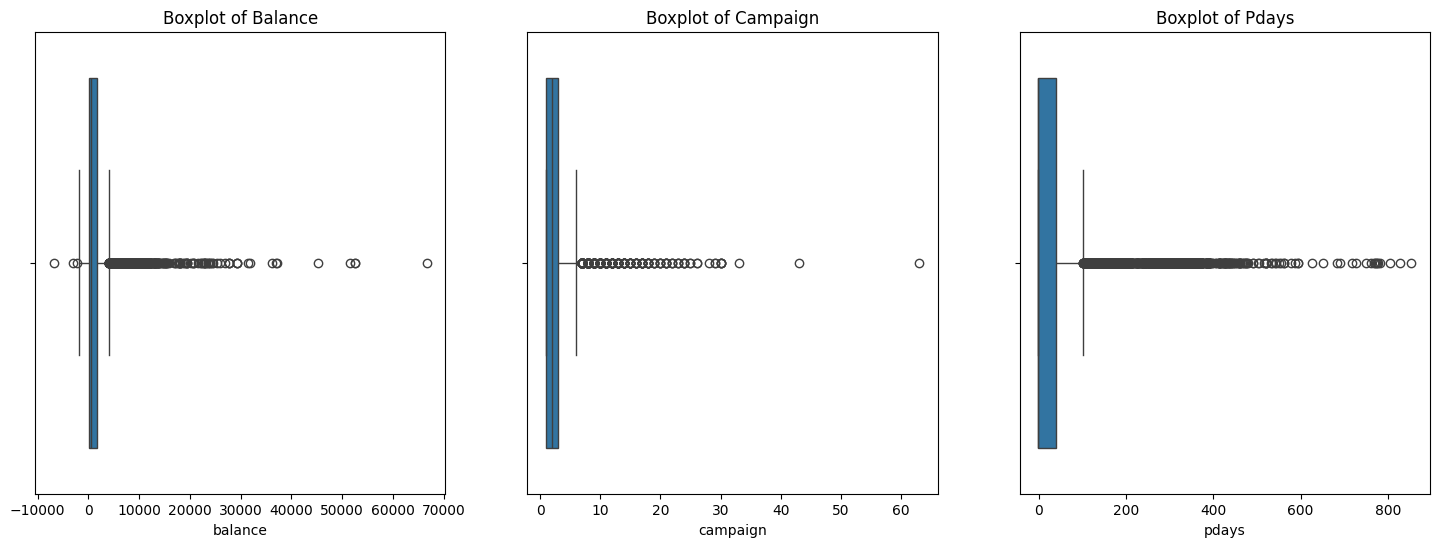

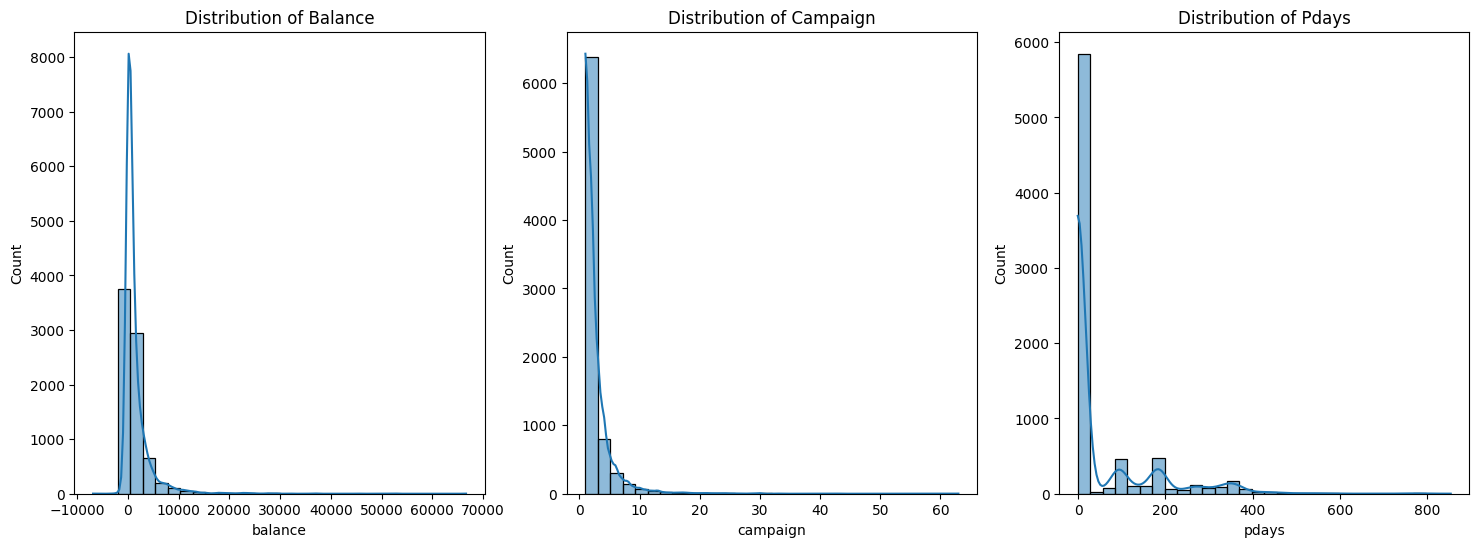

In [309]:
# Visualisasi Outlier dengan Boxplot
plt.figure(figsize=(18, 6))

# Boxplot untuk kolom 'balance'
plt.subplot(1, 3, 1)
sns.boxplot(x=data['balance'])
plt.title('Boxplot of Balance')

# Boxplot untuk kolom 'campaign'
plt.subplot(1, 3, 2)
sns.boxplot(x=data['campaign'])
plt.title('Boxplot of Campaign')

# Boxplot untuk kolom 'pdays'
plt.subplot(1, 3, 3)
sns.boxplot(x=data['pdays'])
plt.title('Boxplot of Pdays')

plt.show()

# Visualisasi Distribusi dengan Histogram
plt.figure(figsize=(18, 6))

# Histogram untuk kolom 'balance'
plt.subplot(1, 3, 1)
sns.histplot(data['balance'], kde=True, bins=30)
plt.title('Distribution of Balance')

# Histogram untuk kolom 'campaign'
plt.subplot(1, 3, 2)
sns.histplot(data['campaign'], kde=True, bins=30)
plt.title('Distribution of Campaign')

# Histogram untuk kolom 'pdays'
plt.subplot(1, 3, 3)
sns.histplot(data['pdays'], kde=True, bins=30)
plt.title('Distribution of Pdays')

plt.show()

## Analisis Boxplot dan Histogram dari Kolom Balance, Campaign, dan Pdays

### 1. Kolom Balance
- **Distribusi**: Distribusi dari kolom `balance` sangat miring ke kanan (right-skewed), dengan sebagian besar nilai berada di dekat nol.
- **Outlier**: Terlihat banyak outlier di sisi kanan, menunjukkan beberapa klien dengan saldo bank yang sangat tinggi dibandingkan dengan mayoritas klien lainnya.
- **Catatan**: Skewness yang tinggi dapat mempengaruhi performance model machine learning, dan outlier yang ekstrem dapat mengganggu hasil analisis jika tidak ditangani dengan tepat.

### 2. Kolom Campaign
- **Distribusi**: Kolom `campaign` juga menunjukkan distribusi yang miring ke kanan, dengan sebagian besar klien hanya dihubungi beberapa kali.
- **Outlier**: Ada outlier yang signifikan di mana beberapa klien dihubungi hingga puluhan kali. Ini mungkin mengindikasikan ketidak-efektifan kampanye marketing atau data yang mungkin salah input.
- **Catatan**: Perlu dilakukan peninjauan terhadap data ini untuk memahami alasan mengapa beberapa klien dihubungi begitu banyak kali.

### 3. Kolom Pdays
- **Distribusi**: Distribusi dari kolom `pdays` menunjukkan bahwa mayoritas klien tidak dihubungi kembali selama beberapa hari, atau mungkin tidak dihubungi sama sekali.
- **Outlier**: Ada beberapa outlier di mana klien dihubungi kembali setelah waktu yang sangat lama, yang mungkin mengindikasikan masalah dalam pengaturan waktu follow-up.
- **Catatan**: Nilai `pdays` yang sangat tinggi (misalnya lebih dari 300 hari) mungkin perlu dipertimbangkan untuk diperlakukan sebagai kategori khusus atau perlu ditinjau kembali.

### Kesimpulan Umum
- **Transformasi yang Diperlukan**: Mengingat distribusi yang sangat miring di semua kolom ini, kita akan lakukan Log Transformation
- **Tindakan Lanjutan**: Setelah transformasi, distribusi baru harus dievaluasi kembali untuk memastikan bahwa tindakan yang diambil telah berhasil mengurangi skewness dan menormalkan data.


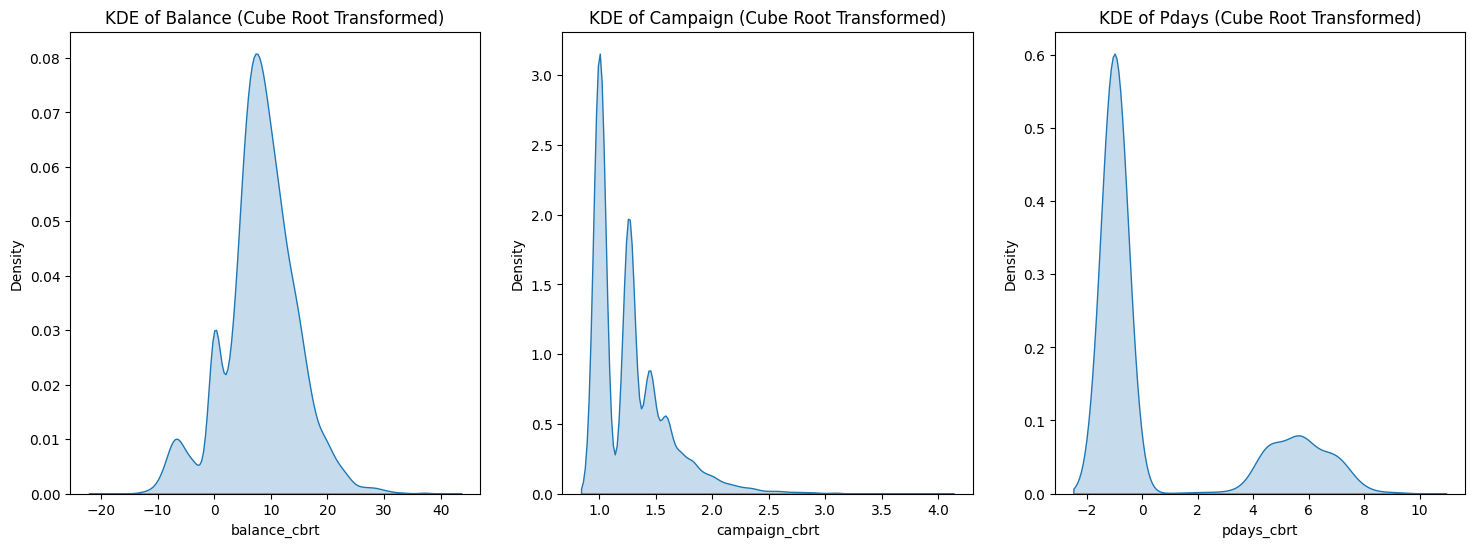

In [310]:
# Transformasi cube root
data['balance_cbrt'] = np.cbrt(data['balance'])
data['campaign_cbrt'] = np.cbrt(data['campaign'])
data['pdays_cbrt'] = np.cbrt(data['pdays'])

plt.figure(figsize=(18, 6))

# KDE plot untuk balance
plt.subplot(1, 3, 1)
sns.kdeplot(data['balance_cbrt'], shade=True)
plt.title('KDE of Balance (Cube Root Transformed)')

# KDE plot untuk campaign
plt.subplot(1, 3, 2)
sns.kdeplot(data['campaign_cbrt'], shade=True)
plt.title('KDE of Campaign (Cube Root Transformed)')

# KDE plot untuk pdays
plt.subplot(1, 3, 3)
sns.kdeplot(data['pdays_cbrt'], shade=True)
plt.title('KDE of Pdays (Cube Root Transformed)')

plt.show()


## Analisis KDE setelah Transformasi Cube Root

### 1. Kolom `balance_cbrt`
- **Distribusi**: Setelah transformasi cube root, distribusi `balance` menunjukkan pengurangan skewness. Puncak utama terlihat di sekitar nilai positif kecil, meskipun masih ada sedikit skewness ke kanan yang tersisa, yang umumnya terjadi dalam data keuangan seperti saldo bank.
- **Observasi**: Terlihat beberapa variasi di sisi negatif, yang mungkin merupakan indikasi data dengan saldo negatif yang telah diubah menggunakan cube root. Transformasi ini membantu meratakan distribusi tanpa mengubah data secara drastis.

### 2. Kolom `campaign_cbrt`
- **Distribusi**: Meskipun distribusi `campaign` masih menunjukkan skewness ke kanan, transformasi cube root telah membantu membuatnya lebih halus. Ada beberapa puncak kecil yang menunjukkan frekuensi kontak tertentu yang lebih umum terjadi.
- **Observasi**: Walaupun transformasi ini telah membantu, data ini mungkin masih mengandung outlier atau cluster yang signifikan, yang tetap terlihat dalam distribusi.

### 3. Kolom `pdays_cbrt`
- **Distribusi**: Distribusi `pdays_cbrt` menunjukkan adanya dua puncak utama, yang mengindikasikan bahwa ada dua kelompok berbeda dalam data: satu kelompok yang hampir tidak dihubungi kembali (nilai `pdays` rendah), dan kelompok lain yang mungkin dihubungi kembali setelah waktu yang cukup lama.
- **Observasi**: Transformasi cube root berhasil meratakan data ini dengan baik, meskipun masih ada beberapa struktur dalam data yang tetap terlihat, yang mungkin penting untuk analisis lebih lanjut.

### Kesimpulan
- **Peningkatan Distribusi**: KDE memberikan visualisasi yang lebih halus dari distribusi data setelah transformasi cube root. Transformasi ini berhasil mengurangi skewness tanpa mengubah karakteristik data secara signifikan.
- **Relevansi**: Distribusi setelah transformasi menunjukkan bahwa cube root adalah pilihan yang baik untuk mengatasi skewness, menjaga keseimbangan antara perubahan distribusi dan mempertahankan struktur data asli.
- **Langkah Selanjutnya**: Dengan distribusi yang telah diperbaiki ini, data siap untuk digunakan dalam analisis atau modeling lebih lanjut. Jika diperlukan, saya bisa mempertimbangkan penanganan khusus untuk outlier atau struktur data yang masih terlihat.



In [311]:
# Membuat daftar informasi tentang setiap kolom
column_info = []

for col in data.columns:
    dtype = data[col].dtype
    nan_count = data[col].isna().sum()
    nan_percent = (nan_count / len(data)) * 100
    unique_values = data[col].unique()
    nunique = data[col].nunique()
    
    if dtype in ['int64', 'float64']:
        outlier_count, outlier_percent = detect_outliers(data, col)
    else:
        outlier_count, outlier_percent = np.nan, np.nan
    
    column_info.append({
        'Column Name': col,
        'Data Type': dtype,
        'NaN Count': nan_count,
        'NaN %': nan_percent,
        'Unique Values': unique_values,
        'nUnique': nunique,
        'Outlier Count': outlier_count,
        'Outlier %': outlier_percent
    })

# Mengubah daftar informasi menjadi dataframe
column_info_df = pd.DataFrame(column_info)
column_info_df

,Column Name,Data Type,NaN Count,NaN %,Unique Values,nUnique,Outlier Count,Outlier %
0,age,int64,0,0.0,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3...",75,121.0,1.548701
1,job,object,0,0.0,"[admin., self-employed, services, housemaid, t...",12,NaN,NaN
2,balance,int64,0,0.0,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ...",3153,736.0,9.420197
3,housing,object,0,0.0,"[no, yes]",2,NaN,NaN
4,loan,object,0,0.0,"[no, yes]",2,NaN,NaN
5,contact,object,0,0.0,"[cellular, telephone, unknown]",3,NaN,NaN
6,month,object,0,0.0,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ...",12,NaN,NaN
7,campaign,int64,0,0.0,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28...",32,429.0,5.490849
8,pdays,int64,0,0.0,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,...",422,1454.0,18.610009
9,poutcome,object,0,0.0,"[unknown, other, failure, success]",4,NaN,NaN


## Outlier turun pada setiap kolom yang di cbrt

# **Penanganan unique values untuk kolom poutcome**

In [312]:
# Ringkasan deskriptif untuk kolom poutcome
poutcome_summary = data['poutcome'].value_counts()
poutcome_summary_data = pd.DataFrame(poutcome_summary)
poutcome_summary_data['%'] = data['poutcome'].value_counts()/len(data['poutcome'])*100
poutcome_summary_data


,count,%
poutcome,,
unknown,5819,74.478433
failure,848,10.853705
success,761,9.740177
other,385,4.927685


### Terlihat dalam tabel, bahwa persentase unkown sangat besar di kolom `poutcome`. Apabila kita imputasi, akan terjadi bias karena unkown merupakan sebuah majoritas. Selanjutnya, kita lihat proporsi deposit untuk setiap `poutcome`:

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

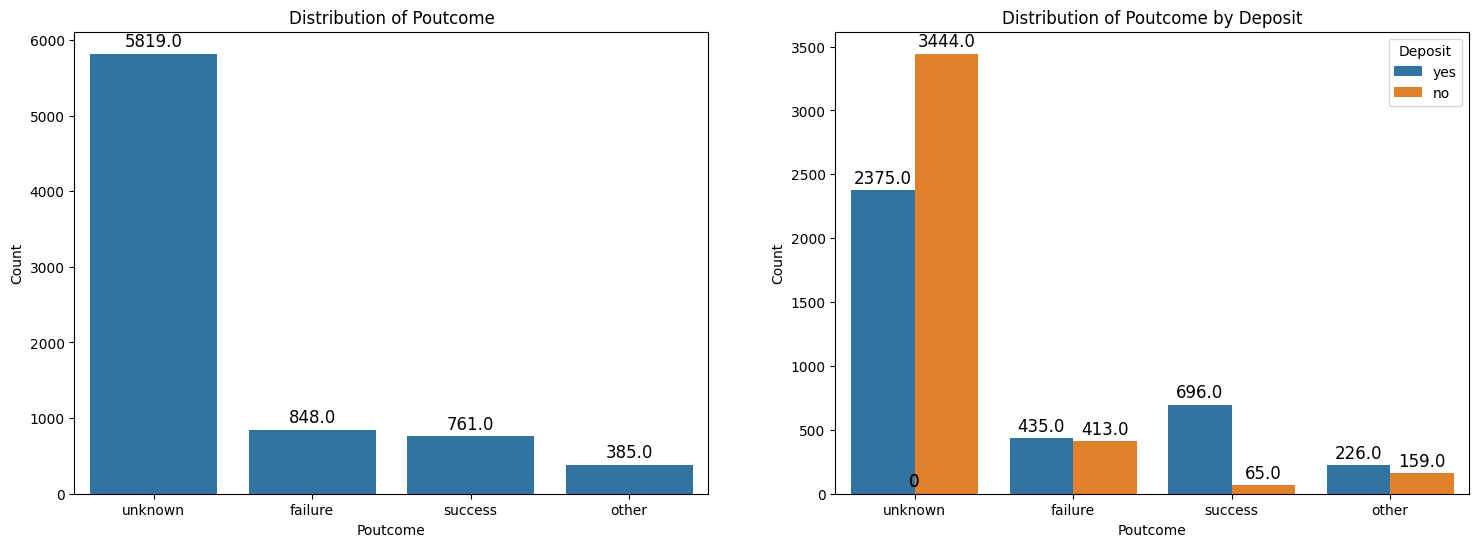

In [313]:
# Membuat subplot untuk visualisasi distribusi poutcome dan distribusi berdasarkan deposit
plt.figure(figsize=(18, 6))

# Subplot 1: Distribusi poutcome
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=data, x='poutcome', order=data['poutcome'].value_counts().index)
plt.title('Distribution of Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')

# Menambahkan label count pada setiap bar
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Subplot 2: Distribusi poutcome berdasarkan target (deposit)
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=data, x='poutcome', hue='deposit', order=data['poutcome'].value_counts().index)
plt.title('Distribution of Poutcome by Deposit')
plt.xlabel('Poutcome')
plt.ylabel('Count')
plt.legend(title='Deposit')

# Menambahkan label count pada setiap bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout

#### - Terlihat bahwa pada seluruh pelanggan yang `poutcome` ialah **unknown**, kebanyakan pelanggan tidak melakukan deposit. Dengan ini, kita bisa simpulkan bahwa apabila data `poutcome` pada pelanggan merupakan **unknown**, berarti pelanggan tersebut lebih cenderung ke tidak melakukan deposit. 

#### - Pada failure, terlihat kesimbangan pada pelanggan deposit dan tidak

#### - Pada success, terlihat pelanggan yang `poutcome` success cenderung akan melakukan deposit.

#### - Sementara pada other, kecenderungan pelanggan yang `poutcome` other akan deposit

## Kesimpulan: `poutcome` *Unknown* dan *success* mempunyai korelasi berat dengan deposit.
## Solusi: buat kolom baru `is_unknown` dan `is_success`. Menghapus kolom `poutcome` karena sudah ada representasi dari fitur tersebut yang berpengaruh ke target

In [314]:
# Membuat kolom baru `is_unknown` dan `is_success`
data['is_unknown_poutcome'] = data['poutcome'].apply(lambda x: 1 if x == 'unknown' else 0)
data['is_success_poutcome'] = data['poutcome'].apply(lambda x: 1 if x == 'success' else 0)
# data.drop(columns= 'poutcome', inplace=True)

# Menampilkan 5 baris pertama untuk memastikan kolom baru sudah terbentuk
data[['is_unknown_poutcome', 'is_success_poutcome']].head()


,is_unknown_poutcome,is_success_poutcome
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0


In [315]:
# Membuat daftar informasi tentang setiap kolom
column_info = []

for col in data.columns:
    dtype = data[col].dtype
    nan_count = data[col].isna().sum()
    nan_percent = (nan_count / len(data)) * 100
    unique_values = data[col].unique()
    nunique = data[col].nunique()
    
    if dtype in ['int64', 'float64']:
        outlier_count, outlier_percent = detect_outliers(data, col)
    else:
        outlier_count, outlier_percent = np.nan, np.nan
    
    column_info.append({
        'Column Name': col,
        'Data Type': dtype,
        'NaN Count': nan_count,
        'NaN %': nan_percent,
        'Unique Values': unique_values,
        'nUnique': nunique,
        'Outlier Count': outlier_count,
        'Outlier %': outlier_percent
    })

# Mengubah daftar informasi menjadi dataframe
column_info_df = pd.DataFrame(column_info)
column_info_df

,Column Name,Data Type,NaN Count,NaN %,Unique Values,nUnique,Outlier Count,Outlier %
0,age,int64,0,0.0,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3...",75,121.0,1.548701
1,job,object,0,0.0,"[admin., self-employed, services, housemaid, t...",12,NaN,NaN
2,balance,int64,0,0.0,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ...",3153,736.0,9.420197
3,housing,object,0,0.0,"[no, yes]",2,NaN,NaN
4,loan,object,0,0.0,"[no, yes]",2,NaN,NaN
5,contact,object,0,0.0,"[cellular, telephone, unknown]",3,NaN,NaN
6,month,object,0,0.0,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ...",12,NaN,NaN
7,campaign,int64,0,0.0,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28...",32,429.0,5.490849
8,pdays,int64,0,0.0,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,...",422,1454.0,18.610009
9,poutcome,object,0,0.0,"[unknown, other, failure, success]",4,NaN,NaN


## **Cek Multikolinearitas**

## Penjelasan:
##### **sm.add_constant(X)**: Menambahkan kolom konstanta (bias) ke data yang diperlukan untuk menghitung VIF.
##### **variance_inflation_factor(X.values, i)**: Menghitung VIF untuk setiap kolom dalam X.

## Interpretasi:
### - **VIF = 1**: Tidak ada korelasi antara variabel tersebut dengan variabel lainnya.
### - **1 < VIF < 5**: Ada korelasi moderat, tapi masih dapat diterima.
### - **VIF > 5**: Ada korelasi yang tinggi, dan mungkin perlu diperiksa lebih lanjut.
### - **VIF > 10**: Korelasi sangat tinggi, dan variabel tersebut mungkin perlu dihilangkan atau dimodifikasi.

In [316]:
# Pilih semua kolom numerik
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Membuat DataFrame dengan kolom numerik
Xn = data[numeric_columns]

# Tambahkan kolom konstanta untuk VIF
Xn = sm.add_constant(Xn)

Xn.drop(columns = ['is_unknown_poutcome', 'is_success_poutcome', 'balance', 'campaign', 'pdays'], inplace=True)

# Menghitung VIF untuk setiap kolom numerik
vif_data = pd.DataFrame()
vif_data['Feature'] = Xn.columns
vif_data['VIF'] = [variance_inflation_factor(Xn.values, i) for i in range(Xn.shape[1])]

# Menampilkan hasil VIF
vif_data

,Feature,VIF
0,const,29.748184
1,age,1.011598
2,balance_cbrt,1.018914
3,campaign_cbrt,1.020880
4,pdays_cbrt,1.026847


## Feature VIF terlihat normal, bahkan hampir tidak ada korelasi dengan variabel lainya

# **Kita lanjut untuk cek seberapa berpengaruh fitur **kategori** terhadap `deposit`**

In [317]:
# Pilih kolom kategorikal dari dataset
categorical_columns = data.select_dtypes(include=['object']).columns

# Menyimpan hasil Chi-squared test dalam DataFrame dengan kolom tambahan 'Berpengaruh'
chi2_results = []

# Melakukan Chi-squared test untuk setiap pasangan kolom kategorikal
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        # Membuat tabel kontingensi
        contingency_table = pd.crosstab(data[categorical_columns[i]], data[categorical_columns[j]])
        # Melakukan Chi-squared test
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        # Menentukan apakah hasilnya berpengaruh berdasarkan p-value
        berpengaruh = p < 0.05  # anggap p-value < 0.05 sebagai berpengaruh
        # Menyimpan hasilnya
        chi2_results.append({
            'Feature Name': categorical_columns[i],
            'Unique Values': categorical_columns[j],
            'Chi2': chi2,
            'p-value': p,
            'Degrees of Freedom': dof,
            'Berpengaruh': berpengaruh
        })

# Mengonversi hasil menjadi DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

chi2_results_df

,Feature Name,Unique Values,Chi2,p-value,Degrees of Freedom,Berpengaruh
0,job,housing,772.429326,1.570552e-158,11,True
1,job,loan,142.928475,4.128973e-25,11,True
2,job,contact,534.317955,4.997674e-99,22,True
3,job,month,1008.844829,5.923522e-140,121,True
4,job,poutcome,210.187372,1.112103e-27,33,True
5,job,deposit,265.051044,1.955572e-50,11,True
6,housing,loan,70.609696,4.353721e-17,1,True
7,housing,contact,517.550193,4.124805e-113,2,True
8,housing,month,1728.435786,0.000000e+00,11,True
9,housing,poutcome,189.241244,8.902479e-41,3,True


## Hampir semua feature dan unique values berpengaruh terhadap deposit. Mari kita lanjut dengan pengecekan korelasi

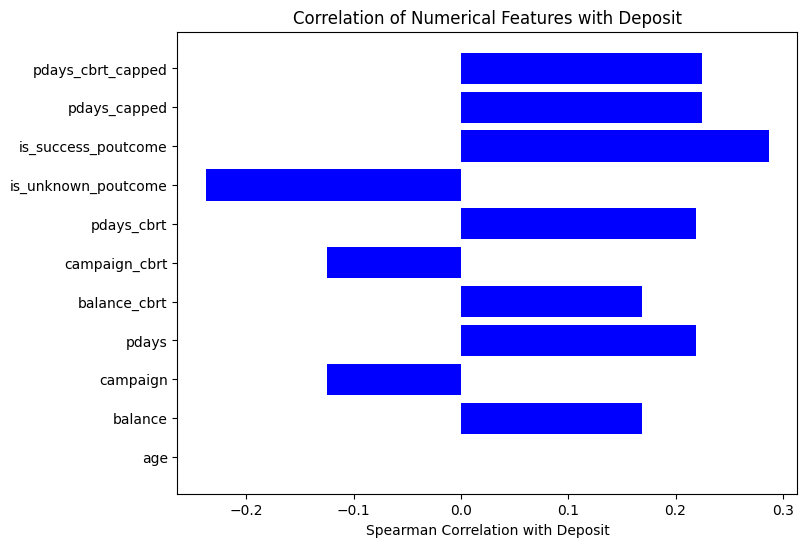

,Feature,Spearman Correlation with Deposit
0,age,0.000583
1,balance,0.168333
2,campaign,-0.124820
3,pdays,0.219493
4,balance_cbrt,0.168333
5,campaign_cbrt,-0.124820
6,pdays_cbrt,0.219493
7,is_unknown_poutcome,-0.237757
8,is_success_poutcome,0.287344
9,pdays_capped,0.224891


In [318]:
import psayas as pd
import matplotlib.pyplot as plt

# Mengubah hasil korelasi menjadi DataFrame
correlation_df = pd.DataFrame(correlation_with_deposit, columns=['Spearman Correlation with Deposit']).reset_index()
correlation_df = correlation_df.rename(columns={'index': 'Feature'})


# Membuat bar graph horizontal untuk korelasi
plt.figure(figsize=(8, 6))
plt.barh(correlation_df['Feature'], correlation_df['Spearman Correlation with Deposit'], color='blue')
plt.xlabel('Spearman Correlation with Deposit')
plt.title('Correlation of Numerical Features with Deposit')
plt.show()

correlation_df


Dari hasil korelasi Spearman antara fitur-fitur numerik dengan target `deposit`, beberapa poin penting dapat diidentifikasi:

1. **`is_success_poutcome`**:
   - Korelasi positif tertinggi dengan `deposit` (0.287344) menunjukkan bahwa klien yang memiliki hasil kampanye sebelumnya yang sukses lebih mungkin untuk melakukan deposit. Hal ini menunjukkan bahwa kesuksesan kampanye sebelumnya adalah indikator yang kuat untuk keberhasilan kampanye saat ini.

2. **`is_unknown_poutcome`**:
   - Korelasi negatif yang cukup signifikan dengan `deposit` (-0.237757) menunjukkan bahwa klien yang hasil kampanye sebelumnya tidak diketahui cenderung tidak melakukan deposit. Ini mungkin mengindikasikan bahwa ketidakpastian atau kurangnya informasi dari kampanye sebelumnya dapat mengurangi kepercayaan atau minat klien dalam melakukan deposit.

3. **`pdays` dan `pdays_capped`**:
   - Kedua fitur ini menunjukkan korelasi positif yang cukup kuat dengan `deposit`, dengan nilai korelasi masing-masing sebesar 0.224891. Ini berarti semakin lama waktu yang telah berlalu sejak klien terakhir kali dihubungi, semakin besar kemungkinan mereka untuk melakukan deposit, terutama setelah melakukan transformasi dan capping pada data.

4. **`balance` dan `balance_cbrt`**:
   - Kedua fitur ini memiliki korelasi positif sebesar 0.168333 dengan `deposit`. Ini menunjukkan bahwa klien dengan saldo yang lebih tinggi cenderung lebih mungkin melakukan deposit. Meskipun korelasinya tidak terlalu kuat, ini tetap merupakan indikator penting.

5. **`campaign` dan `campaign_cbrt`**:
   - Korelasi negatif antara jumlah kampanye yang diikuti klien dengan `deposit` (-0.124820) menunjukkan bahwa semakin banyak kampanye yang diikuti klien, semakin kecil kemungkinan mereka untuk melakukan deposit. Ini mungkin disebabkan oleh kejenuhan atau terlalu banyaknya penawaran yang diterima oleh klien.

6. **`age`**:
   - Korelasi antara usia klien dengan `deposit` sangat rendah (0.000583), menunjukkan bahwa tidak ada hubungan linear yang signifikan antara usia dan keputusan untuk melakukan deposit. Namun, sesuai dengan background knowldege saya, umur dapat mempengaruhi. 

# **Konklusi**: Dikarenakan kita transformasi kolom `balance`, `campaign` dan `pdays`, kita akan hapus kolom tersebut untuk modelling


In [319]:
# Membuat daftar informasi tentang setiap kolom
column_info = []

for col in data.columns:
    dtype = data[col].dtype
    nan_count = data[col].isna().sum()
    nan_percent = (nan_count / len(data)) * 100
    unique_values = data[col].unique()
    nunique = data[col].nunique()
    
    if dtype in ['int64', 'float64']:
        outlier_count, outlier_percent = detect_outliers(data, col)
    else:
        outlier_count, outlier_percent = np.nan, np.nan
    
    column_info.append({
        'Column Name': col,
        'Data Type': dtype,
        'NaN Count': nan_count,
        'NaN %': nan_percent,
        'Unique Values': unique_values,
        'nUnique': nunique,
        'Outlier Count': outlier_count,
        'Outlier %': outlier_percent
    })

# Mengubah daftar informasi menjadi dataframe
column_info_df = pd.DataFrame(column_info)
column_info_df

,Column Name,Data Type,NaN Count,NaN %,Unique Values,nUnique,Outlier Count,Outlier %
0,age,int64,0,0.0,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3...",75,121.0,1.548701
1,job,object,0,0.0,"[admin., self-employed, services, housemaid, t...",12,NaN,NaN
2,balance,int64,0,0.0,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ...",3153,736.0,9.420197
3,housing,object,0,0.0,"[no, yes]",2,NaN,NaN
4,loan,object,0,0.0,"[no, yes]",2,NaN,NaN
5,contact,object,0,0.0,"[cellular, telephone, unknown]",3,NaN,NaN
6,month,object,0,0.0,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ...",12,NaN,NaN
7,campaign,int64,0,0.0,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28...",32,429.0,5.490849
8,pdays,int64,0,0.0,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,...",422,1454.0,18.610009
9,poutcome,object,0,0.0,"[unknown, other, failure, success]",4,NaN,NaN


## Feature yang lolos untuk modelling: 
1. `age`
2. `job`
3. `housing`
4. `loan`
5. `contact`
6. `month`
7. `balance_cbrt`
8. `campaign_cbrt`
9. `pdays_cbrt`
10. `is_unknown_poutcome`
11. `is_success_poutcome`

## Berikutnya mari kita cek proporsi deposit:

deposit
no     0.522335
yes    0.477665
Name: proportion, dtype: float64


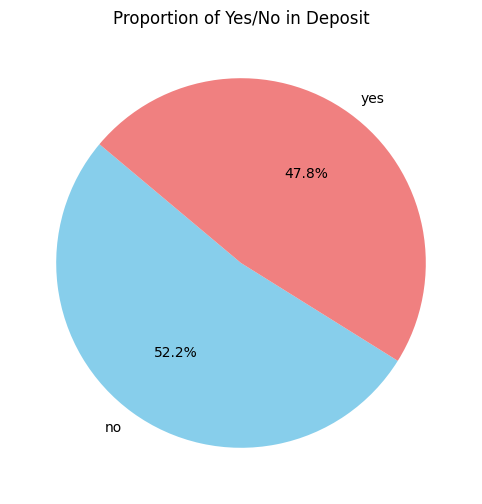

In [320]:
# Menghitung proporsi 'yes' dan 'no' dalam kolom 'deposit'
deposit_proportion = data['deposit'].value_counts(normalize=True)

# Menampilkan hasil proporsi
print(deposit_proportion)

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(deposit_proportion, labels=deposit_proportion.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Proportion of Yes/No in Deposit')
plt.show()

## Terlihat bahwa proporsi yes & no lumayan seimbang
### - **Yes : 47.8%**
### - **No : 52.2%**

Jadi, tidak perlu pakai resampling untuk dataset kita

## **Feature Engineering** : Pipeline & Preprocessing

### Transformasi yes dan no pada data menjadi 1 dan 0

In [321]:

# Fungsi untuk mengubah 'yes' menjadi 1 dan 'no' menjadi 0
def yes_no_to_binary(df):
    df = df.copy()
    for col in ['housing', 'loan', 'deposit']:
        df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)
    return df

# Terapkan fungsi ke dataset
data_transformed = yes_no_to_binary(data)


### definisikan untuk kolom-kolom dan preprocessing 

In [322]:
# Definisi kolom
scaling_columns = ['balance_cbrt', 'campaign_cbrt', 'pdays_cbrt']
onehot_columns = ['contact']
binary_columns = ['job', 'month']

# Preprocessing Pipeline with ColumnTransformer
preprocessing_pipeline = ColumnTransformer(transformers=[
    ('robust_scaler', RobustScaler(), scaling_columns),
    ('onehot', OneHotEncoder(drop='first'), onehot_columns),
    ('binary', ce.BinaryEncoder(), binary_columns)
], remainder='passthrough')

### Pisahkan fitur X dan target y, dan pisahkan masing-masing untuk train set dan test set 80:20

In [323]:
# Memisahkan fitur (X) dan target (y) setelah transformasi
X = data_transformed[[
    'age', 
    'job', 
    'housing', 
    'loan', 
    'contact', 
    'month', 
    'balance_cbrt', 
    'campaign_cbrt', 
    'pdays_cbrt', 
    'is_unknown_poutcome', 
    'is_success_poutcome'
]]
y = data_transformed['deposit']

# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Fit dan Transform: mengaplikasikan preprocessing

In [324]:

# Menerapkan preprocessing pipeline ke data training
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)

# Menerapkan preprocessing pipeline ke data test
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

### Definisi model, model resampling dan pipeline 

In [325]:
# Definisi base models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'MLP Classifier': MLPClassifier(),
    'Gaussian Process': GaussianProcessClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    
    # Mengganti 'base_estimator' dengan 'estimator'
    'Bagging with Decision Tree': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42),
    
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))
    ], voting='soft')
}

## Mencari model terbaik: Cross Validation

#### Mengapa Cross-Validation?
- Menghindari Overfitting: Dengan membagi data menjadi beberapa subset (folds) dan melatih model pada berbagai subset ini, saya dapat memastikan bahwa model saya tidak hanya berkinerja baik pada satu subset data tetapi juga pada data lain yang mungkin belum pernah dilihat model.
- Evaluasi Kinerja yang Lebih Akurat: Cross-validation memberikan estimasi kinerja model yang lebih akurat dibandingkan jika saya hanya menggunakan satu training dan test split.
- Membandingkan Model: Ini juga berguna untuk membandingkan berbagai model secara adil, karena setiap model dievaluasi berdasarkan kinerja rata-rata di beberapa fold.

In [327]:

# Menyimpan hasil cross-validation dalam DataFrame
results_df = pd.DataFrame(columns=['Model', 'Mean Precision', 'Stsayard Deviation'])

# Cross-validation dengan 30 fold
cv = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)

# Evaluasi model
for model_name, model in models.items():
    # Menghitung cross_val_score untuk presisi
    scores = cross_val_score(model, X_train_preprocessed, y_train, cv=cv, scoring='precision')
    
    # Menyimpan hasil dalam DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({
        'Model': [model_name],
        'Mean Precision': [scores.mean()],
        'Stsayard Deviation': [scores.std()]
    })], ignore_index=True)

# Menampilkan hasil
results_df = results_df.sort_values(by='Mean Precision', ascending=False).reset_index(drop=True)
print(results_df)

                              Model  Mean Precision  Standard Deviation
0   Quadratic Discriminant Analysis        0.742484            0.043076
1                 Gradient Boosting        0.740008            0.043964
2         Support Vector Classifier        0.717104            0.047131
3                    MLP Classifier        0.716989            0.051786
4                          AdaBoost        0.716212            0.044310
5                     Random Forest        0.706848            0.038633
6                  Gaussian Process        0.698412            0.040139
7        Bagging with Decision Tree        0.697538            0.036551
8              Gaussian Naive Bayes        0.679939            0.045282
9               Logistic Regression        0.679045            0.042137
10     Linear Discriminant Analysis        0.674209            0.042716
11                      Extra Trees        0.673227            0.034147
12                Voting Classifier        0.646667            0

In [328]:
results_df

,Model,Mean Precision,Standard Deviation
0,Quadratic Discriminant Analysis,0.742484,0.043076
1,Gradient Boosting,0.740008,0.043964
2,Support Vector Classifier,0.717104,0.047131
3,MLP Classifier,0.716989,0.051786
4,AdaBoost,0.716212,0.044310
5,Random Forest,0.706848,0.038633
6,Gaussian Process,0.698412,0.040139
7,Bagging with Decision Tree,0.697538,0.036551
8,Gaussian Naive Bayes,0.679939,0.045282
9,Logistic Regression,0.679045,0.042137


## Mendapatkan Model Terbaik dari results_df

In [329]:
# Mendapatkan baris dengan Mean Precision tertinggi
best_model_row = results_df.loc[results_df['Mean Precision'].idxmax()]

# Mendapatkan nama model terbaik
best_model_name = best_model_row['Model']
print(f"Best Model: {best_model_name}")

Best Model: Quadratic Discriminant Analysis


### Setelah mandapaktan model terbaik, kita akan cek untuk parameter terbaiknya juga melalui hyperparameter tuning

## **Hyper Parameter Tuning**

In [338]:
# Definisikan parameter grid untuk QDA dengan area pencarian yang lebih luas
param_grid_qda = {
    'reg_param': np.arange(0.0, 1.1, 0.1),  # Mencakup nilai dari 0.0 hingga 1.0 dengan step 0.1 (11 variasi)
    'tol': np.logspace(-5, -1, 10),  # Nilai toleransi dari 1e-5 hingga 1e-1 (10 variasi)
    'store_covariance': [True, False]  # Dua opsi, True atau False
}

# Buat GridSearchCV untuk QDA
grid_search_qda = GridSearchCV(
    estimator=QuadraticDiscriminantAnalysis(),
    param_grid=param_grid_qda,
    scoring='precision',
    cv=30,  # Menggunakan 30-fold cross-validation
    n_jobs=-1,
    verbose=1
)

# Fit ke data training yang telah diproses
grid_search_qda.fit(X_train_preprocessed, y_train)

# Tampilkan hyperparameter terbaik
print(f"Best parameters for QDA: {grid_search_qda.best_params_}")
print(f"Best precision score: {grid_search_qda.best_score_:.4f}")

Fitting 30 folds for each of 220 candidates, totalling 6600 fits
Best parameters for QDA: {'reg_param': 0.0, 'store_covariance': True, 'tol': 1e-05}
Best precision score: 0.7438


### Setelah mendapatkan parameter terbaik, kita akan membandingkan dengan test set data kita yang belum kita sentuh untuk perbandingan di real case

## **Perbandingan hasil presisi di train dataset dan test dataset**

In [340]:
best_qda_model = grid_search_qda.best_estimator_

cv_scores = cross_val_score(best_qda_model, X_train_preprocessed, y_train, cv=30, scoring='precision')
train_precision_mean = cv_scores.mean()
train_precision_std = cv_scores.std()

# Langkah 5: Evaluasi pada data test set
y_test_pred = best_qda_model.predict(X_test_preprocessed)

# Hitung precision pada test set
test_precision = precision_score(y_test, y_test_pred)

# Hitung stsayard deviation pada test set (untuk single test tidak ada stsayard deviation dari sklearn)
test_precision_std = 0  # karena hanya ada satu set data test

# Membuat DataFrame untuk menampilkan hasil
results_df = pd.DataFrame({
    'Dataset': ['Training Set (CV)', 'Test Set'],
    'Precision': [train_precision_mean, test_precision],
    'Stsayard Deviation': [train_precision_std, test_precision_std]
})

# Menampilkan hasil
results_df

,Dataset,Precision,Standard Deviation
0,Training Set (CV),0.743800,0.045352
1,Test Set,0.779783,0.000000


## **Simpan model dalam file pickle**

In [344]:
with open('best_qda_model.pkl', 'wb') as file:
    pickle.dump(best_qda_model, file)

## Hasil Evaluasi Model Quadratic Discriminant Analysis (QDA)

Pada langkah ini, kita telah melakukan evaluasi terhadap model **Quadratic Discriminant Analysis (QDA)** dengan melakukan hyperparameter tuning menggunakan **GridSearchCV**. Setelah mendapatkan kombinasi hyperparameter terbaik, kita kemudian mengevaluasi performance model pada data training melalui cross-validation serta pada data test set yang tidak pernah dilihat model sebelumnya. Berikut adalah hasil yang didapatkan:

### Hasil Evaluasi

| Dataset            | Precision | Stsayard Deviation |
|--------------------|-----------|--------------------|
| **Training Set (CV)** | 0.743800  | 0.045352           |
| **Test Set**         | 0.779783  | 0.000000           |

### Interpretasi

1. **Training Set (CV)**:
   - Precision rata-rata yang diperoleh dari **30-fold cross-validation** pada data training adalah **0.7438**. 
   - Stsayard deviation sebesar **0.0453** menunjukkan bahwa model memiliki performance yang cukup stabil dan konsisten di berbagai subset data training. Ini adalah indikator bahwa model tidak overfitting pada data training dan mampu generalisasi dengan baik pada data yang berbeda.

2. **Test Set**:
   - Precision yang diperoleh dari prediksi pada data test set adalah **0.7798**, yang bahkan lebih tinggi dari precision pada data training. 
   - Hal ini menunjukkan bahwa model QDA mampu menangani data baru dengan sangat baik, dan ada kemungkinan bahwa data test set memiliki distribusi yang sedikit berbeda dari data training, tetapi model tetap berhasil memprediksi dengan akurasi yang tinggi.
   - Precision yang lebih tinggi pada data test set juga memberikan keyakinan bahwa model ini dapat disayalkan untuk digunakan pada data baru di dunia nyata.

### Kesimpulan
Dengan hasil evaluasi ini, kita dapat menyimpulkan bahwa model **Quadratic Discriminant Analysis** telah di-tune dengan baik dan menunjukkan performance yang solid baik pada data training maupun test set. Precision yang tinggi pada test set sangat mendukung tujuan kita untuk mengurangi biaya melalui prediksi yang akurat, meminimalkan false positives, dan secara efektif menargetkan pelanggan yang berpotensi besar untuk melakukan deposit.


## Penjelasan Model Quadratic Discriminant Analysis (QDA)

### Apa itu Quadratic Discriminant Analysis (QDA)?

**Quadratic Discriminant Analysis (QDA)** adalah salah satu metode yang digunakan untuk memprediksi kategori atau kelas suatu data. Model ini sebenarnya merupakan pengembangan dari metode yang lebih sederhana, yaitu **Linear Discriminant Analysis (LDA)**. 

Pada dasarnya, **LDA** mengasumsikan bahwa semua kelas memiliki pola hubungan antar fitur yang sama (disebut matriks kovarians). Hal ini menghasilkan model dengan garis pemisah yang lurus antara kelas-kelas yang berbeda. Namun, **QDA** tidak membuat asumsi tersebut dan justru membiarkan setiap kelas memiliki pola hubungan yang berbeda. Dengan begitu, QDA dapat menangani masalah di mana garis pemisah antara kelas tidak lurus, melainkan melengkung.

### Bagaimana QDA Bekerja?

QDA bekerja dengan cara mempelajari pola atau distribusi data dalam setiap kelas. Berikut adalah langkah-langkah utamanya:

1. **Mengestimasi Mean dan Kovarians**: Untuk setiap kelas (misalnya, "yes" dan "no"), QDA akan menghitung rata-rata dan pola hubungan antar fitur dalam data tersebut.
2. **Membuat Fungsi Diskriminan Kuadratik**: Berdasarkan perhitungan tersebut, QDA akan membentuk suatu fungsi matematika (disebut fungsi diskriminan) yang digunakan untuk membedakan antara kelas-kelas. Karena menggunakan hubungan kuadratik, garis pemisahnya bisa melengkung.
3. **Klasifikasi**: Ketika model dihadapkan pada data baru, QDA akan menggunakan fungsi diskriminan ini untuk menentukan ke kelas mana data tersebut paling mungkin termasuk.

### Mengapa QDA Mungkin Cocok untuk Dataset Ini?

Ada beberapa alasan mengapa **QDA** bisa menjadi pilihan yang tepat untuk dataset Anda:

1. **Pembatas Keputusan Non-Linier**: Jika data dalam dataset Anda memiliki pembatas keputusan yang tidak lurus (non-linier), QDA bisa memberikan hasil yang lebih baik dibandingkan model-model yang hanya bekerja dengan garis lurus, seperti Logistic Regression atau LDA.

2. **Fleksibilitas dalam Menangani Pola yang Berbeda**: QDA tidak mengasumsikan bahwa setiap kelas memiliki pola hubungan antar fitur yang sama. Ini berarti jika data dari kelas "yes" dan "no" menunjukkan pola yang berbeda, QDA dapat mengenali perbedaan ini dan memberikan prediksi yang lebih akurat.

3. **Kemampuan Menangani Variasi yang Kompleks**: Karena QDA mengizinkan variasi yang lebih kompleks antara kelas-kelas, model ini bisa lebih cocok jika fitur-fitur dalam dataset Anda menunjukkan interaksi yang rumit, seperti yang sering terjadi dalam kampanye pemasaran dengan banyak faktor yang mempengaruhi keputusan pelanggan.

### Potensi Alasan Mengapa QDA Berkinerja Baik di Dataset Ini

1. **Pemisahan yang Jelas antara Kelas**: Jika ada perbedaan yang jelas dan non-linier antara pelanggan yang cenderung melakukan deposit dan yang tidak, QDA bisa menangkap perbedaan ini dengan lebih baik.

2. **Kompleksitas Fitur**: Jika fitur-fitur dalam dataset Anda saling berinteraksi dengan cara yang rumit dan tidak mudah dipisahkan oleh garis lurus, QDA adalah model yang tepat karena dapat memodelkan hubungan tersebut dengan lebih baik.

3. **Presisi yang Tinggi**: Hasil evaluasi menunjukkan bahwa QDA mampu memberikan presisi yang sangat baik pada data test set, yang berarti model ini sangat efisien dalam memprediksi pelanggan yang benar-benar akan melakukan deposit. Ini mendukung tujuan Anda untuk mengurangi biaya dengan menargetkan pelanggan yang paling potensial.

Untuk menyimpulkan, **QDA** adalah model yang kuat ketika Anda berhadapan dengan data yang memiliki hubungan non-linier dan pola yang berbeda antar kelas. Hasil yang Anda dapatkan menunjukkan bahwa model ini cocok untuk digunakan dalam kampanye pemasaran Anda, membantu Anda membuat keputusan yang lebih tepat dan efisien.


## Contoh Penerapan Model QDA dalam Kampanye Pemasaran

### Asumsi
Mari kita mulai dengan beberapa asumsi sederhana untuk membantu kita memahami bagaimana penggunaan model **Quadratic Discriminant Analysis (QDA)** dapat membantu menghemat biaya kampanye pemasaran.

- **Biaya per Kampanye**: Setiap kali kita mengirimkan kampanye kepada seorang pelanggan (misalnya, melalui email atau SMS), biayanya adalah **Rp 10.000**.
- **Jumlah Pelanggan dalam Dataset**: Total pelanggan yang ada dalam dataset kita adalah **10.000** orang.
- **Model Precision**: Anggaplah model QDA kita memiliki precision **0.78** (78% dari pelanggan yang diprediksi akan melakukan deposit benar-benar akan melakukan deposit).
- **Proporsi Pelanggan yang Melakukan Deposit**: Dari semua pelanggan, diasumsikan bahwa 20% dari mereka benar-benar akan melakukan deposit setelah kampanye (atau **2.000 pelanggan** dari 10.000).

### Contoh Skenario

#### 1. Skenario Tanpa Model (Kampanye ke Semua Pelanggan)
Bayangkan kita tidak menggunakan model apapun dan memutuskan untuk mengirimkan kampanye kepada semua 10.000 pelanggan. Biaya total kampanye akan menjadi:
**Biaya Total = 10.000 x Rp 10.000 = Rp 100.000.000**

Dari kampanye ini, kita berharap 20% (atau 2.000 pelanggan) akan melakukan deposit. Namun, biaya yang dikeluarkan cukup besar.

#### 2. Skenario dengan Model QDA
Sekarang, bayangkan kita menggunakan model QDA yang memiliki precision **0.78**. Model ini akan memprediksi bahwa dari semua pelanggan yang kita targetkan, **78%** dari mereka benar-benar akan melakukan deposit.

Misalkan model memprediksi bahwa ada 3.000 pelanggan yang akan melakukan deposit (prediksi positif). Dari jumlah ini, 78% atau **2.340 pelanggan** benar-benar akan melakukan deposit.

Biaya total untuk kampanye dengan model ini menjadi:
**Biaya Total dengan Model = 3.000 x Rp 10.000 = Rp 30.000.000**

#### 3. Penghematan Anggaran
Dengan menggunakan model QDA, anggaran yang dikeluarkan adalah Rp 30.000.000, dibandingkan dengan Rp 100.000.000 jika kita mengirim kampanye ke semua pelanggan.

Ini berarti kita dapat menghemat:
**Penghematan Anggaran = Rp 100.000.000 - Rp 30.000.000 = Rp 70.000.000**

### Pengaruh Precision terhadap Penghematan
Precision yang tinggi berarti lebih sedikit pelanggan yang tidak akan melakukan deposit yang menerima kampanye. Dengan demikian, lebih banyak anggaran yang bisa dihemat karena kampanye lebih efektif.

### Kesimpulan
Dengan menggunakan model QDA dan fokus pada **presisi**, Anda bisa mengurangi anggaran kampanye secara signifikan tanpa mengorbankan efektivitas kampanye secara keseluruhan. Model ini memungkinkan Anda untuk menargetkan pelanggan dengan lebih tepat, memastikan bahwa anggaran yang digunakan lebih efisien dalam mencapai pelanggan yang benar-benar berpotensi melakukan deposit.

Ingat, strategi yang baik adalah menargetkan pelanggan yang paling potensial, dan dengan presisi yang tinggi, Anda bisa memastikan bahwa kampanye Anda berjalan dengan lebih cerdas dan hemat.


**Saran dan Limitasi**

Saran :

Evaluasi Berkelanjutan :Meskipun model QDA yang telah dibangun menunjukkan kinerja yang baik, sangat penting untuk terus memantau kinerjanya seiring dengan waktu. Data pelanggan dan perilaku mereka dapat berubah, sehingga model mungkin memerlukan pembaruan atau penyesuaian agar tetap relevan dan efektif.

Penggunaan Model Lain sebagai Pembanding: Disarankan untuk mempertimbangkan model lain sebagai pembanding (benchmark), seperti Random Forest atau Gradient Boosting. Meskipun QDA menunjukkan hasil yang baik, model lain mungkin memberikan kinerja yang lebih unggul di kondisi tertentu.

Pemilihan Metrik yang Sesuai : Dalam konteks mengurangi biaya, presisi adalah metrik yang sangat penting. Namun, jangan abaikan metrik lain seperti recall dan F1-score, terutama jika strategi Anda berubah dan menekankan aspek lain seperti meningkatkan jumlah pelanggan yang merespons.

Eksplorasi Fitur Tambahan : Pertimbangkan untuk menambahkan lebih banyak fitur yang relevan atau melakukan teknik rekayasa fitur (feature engineering) yang lebih mendalam. Ini bisa meningkatkan kinerja model dan membantu dalam pemisahan pelanggan yang lebih baik.

Validasi Data Eksternal : Jika memungkinkan, uji model ini dengan data eksternal atau data dari periode waktu yang berbeda untuk memastikan bahwa model tidak overfitting pada dataset tertentu dan benar-benar dapat diandalkan di berbagai situasi.

Limitasi : 

Asumsi Distribusi Data : QDA mengasumsikan bahwa distribusi data setiap kelas mengikuti distribusi normal (Gaussian). Jika data tidak memenuhi asumsi ini, performa model mungkin tidak optimal. Dalam kasus seperti ini, model lain yang tidak bergantung pada asumsi ini mungkin lebih sesuai.

Sensitivitas terhadap Outlier : QDA dapat menjadi sangat sensitif terhadap outlier karena model ini sangat dipengaruhi oleh distribusi data. Outlier yang signifikan dapat memengaruhi mean dan kovarians, yang dapat mengakibatkan prediksi yang kurang akurat.

Kebergantungan pada Fitur yang Relevan : Kinerja model sangat bergantung pada fitur yang digunakan. Jika fitur yang dimasukkan ke dalam model tidak cukup informatif atau terdapat noise yang signifikan, hasil prediksi mungkin tidak seakurat yang diharapkan.

Skalabilitas : Meskipun QDA bekerja baik pada dataset yang tidak terlalu besar, model ini mungkin tidak cocok untuk dataset dengan jumlah fitur yang sangat tinggi atau sangat besar, karena komputasi kovarians yang kompleks.

Overfitting pada Dataset Kecil : QDA dapat rentan terhadap overfitting jika diterapkan pada dataset yang terlalu kecil atau jika jumlah fitur jauh lebih banyak daripada jumlah sampel. Hal ini dapat menyebabkan model tampak sangat akurat pada data training, tetapi gagal pada data baru.

Kesimpulan :

Meskipun ada beberapa limitasi yang perlu diperhatikan, model QDA yang telah dibangun memiliki potensi besar untuk meningkatkan efisiensi kampanye pemasaran dengan fokus pada presisi yang tinggi. Dengan evaluasi yang berkelanjutan dan pertimbangan terhadap saran di atas, model ini dapat menjadi alat yang kuat dalam strategi pemasaran Anda.
